In [ ]:
import requests
from plotnine import *
from IPython.display import HTML
import plotly.express as px
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import HTML
import json 
import folium
%matplotlib inline

## `#1`. COVID19 시도별 접종률 시각화 (30점)

아래의 그림은 COVID19 예방접종의 시도별 현황을 캡쳐한 것이다. 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/final_FIG1.png?raw=true)

이 정보는 특정 주기로 업데이트 되며 아래의 웹페이지 2번째 테이블에서 확인할 수 있다. 
```
https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000
```
판다스의 `pd.read_html()` 함수를 이용해 위의 페이지에서 그림1의 테이블을 읽어오라. 그리고 folium의 choroplethmap을 활용하여 시도별 2차접종의 접종률을 시각화 하라. 시각화 예시는 아래와 같다. 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/final_FIG2.png?raw=true)

**힌트1.** pd.read_html()을 이용할때 `encoding='utf-8'`옵션을 사용하라. 

**힌트2.** `https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000`의 2번째 테이블을 판다스로 읽어온 결과는 아래와 같아야 한다. 

In [ ]:
#hide_input
dfhtml='<table border="1" class="dataframe">\n  <thead>\n    <tr>\n      <th></th>\n      <th>구분</th>\n      <th colspan="2" halign="left">1차접종</th>\n      <th colspan="2" halign="left">2차접종</th>\n      <th colspan="2" halign="left">3차(부스터)접종</th>\n    </tr>\n    <tr>\n      <th></th>\n      <th>구분</th>\n      <th>당일 실적</th>\n      <th>당일 누계</th>\n      <th>당일 실적</th>\n      <th>당일 누계</th>\n      <th>당일 실적</th>\n      <th>당일 누계</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>합계</td>\n      <td>22505</td>\n      <td>42618296</td>\n      <td>60388</td>\n      <td>41192348</td>\n      <td>179831</td>\n      <td>3570414</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>서울</td>\n      <td>3613</td>\n      <td>7933770</td>\n      <td>8315</td>\n      <td>7698119</td>\n      <td>34397</td>\n      <td>649999</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>부산</td>\n      <td>1355</td>\n      <td>2724073</td>\n      <td>2942</td>\n      <td>2631501</td>\n      <td>11161</td>\n      <td>209295</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>대구</td>\n      <td>925</td>\n      <td>1895746</td>\n      <td>2485</td>\n      <td>1830009</td>\n      <td>7258</td>\n      <td>130330</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>인천</td>\n      <td>1331</td>\n      <td>2430994</td>\n      <td>3781</td>\n      <td>2346905</td>\n      <td>9049</td>\n      <td>183461</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>광주</td>\n      <td>669</td>\n      <td>1190287</td>\n      <td>2190</td>\n      <td>1143284</td>\n      <td>4852</td>\n      <td>108004</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>대전</td>\n      <td>659</td>\n      <td>1173714</td>\n      <td>1692</td>\n      <td>1132714</td>\n      <td>5326</td>\n      <td>92697</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>울산</td>\n      <td>527</td>\n      <td>908812</td>\n      <td>1657</td>\n      <td>879965</td>\n      <td>3311</td>\n      <td>59007</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>세종</td>\n      <td>146</td>\n      <td>272339</td>\n      <td>357</td>\n      <td>261860</td>\n      <td>989</td>\n      <td>22115</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>경기</td>\n      <td>6180</td>\n      <td>11154058</td>\n      <td>16579</td>\n      <td>10788551</td>\n      <td>39809</td>\n      <td>876808</td>\n    </tr>\n    <tr>\n      <th>10</th>\n      <td>강원</td>\n      <td>718</td>\n      <td>1279589</td>\n      <td>2076</td>\n      <td>1237178</td>\n      <td>6373</td>\n      <td>118575</td>\n    </tr>\n    <tr>\n      <th>11</th>\n      <td>충북</td>\n      <td>668</td>\n      <td>1352302</td>\n      <td>2529</td>\n      <td>1307212</td>\n      <td>6536</td>\n      <td>124993</td>\n    </tr>\n    <tr>\n      <th>12</th>\n      <td>충남</td>\n      <td>952</td>\n      <td>1789964</td>\n      <td>2610</td>\n      <td>1725422</td>\n      <td>8595</td>\n      <td>170692</td>\n    </tr>\n    <tr>\n      <th>13</th>\n      <td>전북</td>\n      <td>755</td>\n      <td>1514759</td>\n      <td>2705</td>\n      <td>1460057</td>\n      <td>9037</td>\n      <td>160277</td>\n    </tr>\n    <tr>\n      <th>14</th>\n      <td>전남</td>\n      <td>792</td>\n      <td>1575741</td>\n      <td>2498</td>\n      <td>1520694</td>\n      <td>9319</td>\n      <td>199860</td>\n    </tr>\n    <tr>\n      <th>15</th>\n      <td>경북</td>\n      <td>1255</td>\n      <td>2160015</td>\n      <td>2942</td>\n      <td>2085263</td>\n      <td>9743</td>\n      <td>193965</td>\n    </tr>\n    <tr>\n      <th>16</th>\n      <td>경남</td>\n      <td>1510</td>\n      <td>2712518</td>\n      <td>3997</td>\n      <td>2614451</td>\n      <td>11699</td>\n      <td>226671</td>\n    </tr>\n    <tr>\n      <th>17</th>\n      <td>제주</td>\n      <td>450</td>\n      <td>549615</td>\n      <td>1033</td>\n      <td>529163</td>\n      <td>2377</td>\n      <td>43665</td>\n    </tr>\n  </tbody>\n</table>'
HTML(dfhtml)

**힌트3.** 아래의 주소에서 json을 파일을 읽어온뒤 choroplethmap을 그릴때 이용하라. 
```
https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json
```

**힌트4.** json파일의 지역명과 `https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000`의 지역이름을 맞추어라. json파일의 지역명은 아래와 같은 코드로 확인할 수 있다. 
```python
[global_dict['features'][i]['properties']['name'] for i in range(17)]
```
```
['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']
```

- 여기에서 `global_dict`는 힌트3의 json파일이 저장된 dictionary 이다

**힌트5.** 지역별 접종률은 아래의 수식으로 구한다. 

$$
\textbf{서울특별시 2차접종 접종률}=\frac{\textbf{서울특별시 2차접종 당일누계}}{\textbf{서울특별시 인구수}}
$$

이때 위의 수식의 분모에 사용할 시도별 인구수는 아래의 주소에서 얻을 수 있다. 
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-prov.csv
```

**힌트6.** `eval()`을 이용하면 데이터프레임에서 간단한 column별 연산을 수행할 수 있다. (필요하다면 참고하라) 

In [ ]:
#hide_input
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>prov</th>\n      <th>prop</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>서울특별시</td>\n      <td>0.807572</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>부산광역시</td>\n      <td>0.784046</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>대구광역시</td>\n      <td>0.765463</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>인천광역시</td>\n      <td>0.796909</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>광주광역시</td>\n      <td>0.792597</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>대전광역시</td>\n      <td>0.778911</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>울산광역시</td>\n      <td>0.783887</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>세종특별자치시</td>\n      <td>0.711043</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>경기도</td>\n      <td>0.796228</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>강원도</td>\n      <td>0.804555</td>\n    </tr>\n    <tr>\n      <th>10</th>\n      <td>충청북도</td>\n      <td>0.818569</td>\n    </tr>\n    <tr>\n      <th>11</th>\n      <td>충청남도</td>\n      <td>0.814271</td>\n    </tr>\n    <tr>\n      <th>12</th>\n      <td>전라북도</td>\n      <td>0.815779</td>\n    </tr>\n    <tr>\n      <th>13</th>\n      <td>전라남도</td>\n      <td>0.828873</td>\n    </tr>\n    <tr>\n      <th>14</th>\n      <td>경상북도</td>\n      <td>0.793502</td>\n    </tr>\n    <tr>\n      <th>15</th>\n      <td>경상남도</td>\n      <td>0.787922</td>\n    </tr>\n    <tr>\n      <th>16</th>\n      <td>제주특별자치도</td>\n      <td>0.782127</td>\n    </tr>\n  </tbody>\n</table>')

,prov,prop
0,서울특별시,0.807572
1,부산광역시,0.784046
2,대구광역시,0.765463
3,인천광역시,0.796909
4,광주광역시,0.792597
5,대전광역시,0.778911
6,울산광역시,0.783887
7,세종특별자치시,0.711043
8,경기도,0.796228
9,강원도,0.804555


### Sol

In [ ]:
df1 = pd.read_html("https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000",encoding="utf-8")[1]

In [ ]:
df1

구분 1차접종                  2차접종                 
    구분   신규        누적    접종률   신규        누적    접종률
0   서울    8   8367868  88.6%   20   8292445  87.8%
1   부산    0   2861527  86.1%    3   2834159  85.3%
2   대구    1   2005626  84.6%    2   1983564  83.7%
3   인천    2   2587198  87.2%    0   2563464  86.4%
4   광주    1   1254836  87.4%    0   1243835  86.7%
5   대전    3   1242386  85.7%    3   1230584  84.9%
6   울산    0    963325  86.2%    1    954338  85.4%
7   세종    0    302201  79.5%    1    298534  78.5%
8   경기    7  11606125  87.3%   16  11498671  86.5%
9   강원    1   1348536  87.7%    1   1337787    87%
10  충북    0   1425563  89.3%    4   1413625  88.6%
11  충남    4   1900648  89.5%    0   1883852  88.7%
12  전북    2   1569019  89.1%    2   1556937  88.5%
13  전남    1   1639354  90.1%    2   1625911  89.4%
14  경북    0   2274366  87.5%    3   2251690  86.6%
15  경남    0   2847601    87%    6   2819918  86.1%
16  제주    0    590868  87.3%    0    585437  86.5%

In [ ]:
df1.columns

MultiIndex([(  '구분',  '구분'),
            ('1차접종',  '신규'),
            ('1차접종',  '누적'),
            ('1차접종', '접종률'),
            ('2차접종',  '신규'),
            ('2차접종',  '누적'),
            ('2차접종', '접종률')],
           )

In [ ]:
df1 = df1.set_index((  '구분',  '구분')).stack().\
       reset_index().query("level_1 == '누적'").iloc[:,[0,3]].\
        reset_index(drop=True)

In [ ]:
df1

,"(구분, 구분)",2차접종
0,서울,8292445
1,부산,2834159
2,대구,1983564
3,인천,2563464
4,광주,1243835
5,대전,1230584
6,울산,954338
7,세종,298534
8,경기,11498671
9,강원,1337787


In [ ]:
pop = pd.read_csv("https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-prov.csv")

In [ ]:
data1 = pd.concat([df1,pop],axis=1).iloc[:,[0,2,1,3]]

In [ ]:
data1.columns = ["city_s","city_l","second","pop"]

In [ ]:
data1.dtypes

city_s    object
city_l    object
second    object
pop        int64
dtype: object

In [ ]:
data1["city_s"] = data1["city_s"].astype("str")
data1["city_l"] = data1["city_l"].astype("str")
data1["second"] = data1["second"].astype("int")

In [ ]:
data1 = data1.eval("prop = second/pop")

In [ ]:
global_distriction_jsonurl='https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json'
global_dict = json.loads(requests.get(global_distriction_jsonurl).text)

In [ ]:
name=[global_dict['features'][i]['properties']['name'] for i in range(17)]

In [ ]:
data1

,city_s,city_l,second,pop,prop
0,서울,서울특별시,8292445,9532428,0.869920
1,부산,부산광역시,2834159,3356311,0.844427
2,대구,대구광역시,1983564,2390721,0.829693
3,인천,인천광역시,2563464,2945009,0.870444
4,광주,광주광역시,1243835,1442454,0.862305
5,대전,대전광역시,1230584,1454228,0.846211
6,울산,울산광역시,954338,1122566,0.850140
7,세종,세종특별자치시,298534,368276,0.810626
8,경기,경기도,11498671,13549577,0.848637
9,강원,강원도,1337787,1537717,0.869983


In [ ]:
m = folium.Map([35.84195368311022, 127.1155556693179], zoom_start=7,scrollWheelZoom = False)

choro = folium.Choropleth(data = data1,
                           geo_data = global_dict,
                           columns = ["city_l","prop"],  ## 우리가 표현할 변수
                           key_on = 'feature.properties.name') ## 지리정보데이터의 key값

choro.add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

## `#2`. COVID19 시도별/월별 확산과정 시각화 (40점)

아래는 COVID19 확진자수를 지역별로 매일 기록한 자료이다. 
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv
```
자료를 판다스로 불러온 결과는 아래와 같다. 

In [ ]:
#hide_input
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>일자</th>\n      <th>계(명)</th>\n      <th>서울</th>\n      <th>부산</th>\n      <th>대구</th>\n      <th>인천</th>\n      <th>광주</th>\n      <th>대전</th>\n      <th>울산</th>\n      <th>세종</th>\n      <th>경기</th>\n      <th>강원</th>\n      <th>충북</th>\n      <th>충남</th>\n      <th>전북</th>\n      <th>전남</th>\n      <th>경북</th>\n      <th>경남</th>\n      <th>제주</th>\n      <th>검역</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>누적(명)</td>\n      <td>457,612</td>\n      <td>158,774</td>\n      <td>16,555</td>\n      <td>19,114</td>\n      <td>25,299</td>\n      <td>6,353</td>\n      <td>8,809</td>\n      <td>5,675</td>\n      <td>1,588</td>\n      <td>136,546</td>\n      <td>8,889</td>\n      <td>8,942</td>\n      <td>13,174</td>\n      <td>6,453</td>\n      <td>4,498</td>\n      <td>11,471</td>\n      <td>15,236</td>\n      <td>3,762</td>\n      <td>6,474</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2020-01-20</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2020-01-21</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2020-01-22</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>2020-01-23</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>...</th>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n    </tr>\n    <tr>\n      <th>679</th>\n      <td>2021-11-28</td>\n      <td>3,925</td>\n      <td>1,673</td>\n      <td>148</td>\n      <td>106</td>\n      <td>278</td>\n      <td>52</td>\n      <td>53</td>\n      <td>4</td>\n      <td>5</td>\n      <td>1,090</td>\n      <td>63</td>\n      <td>25</td>\n      <td>121</td>\n      <td>45</td>\n      <td>25</td>\n      <td>103</td>\n      <td>89</td>\n      <td>35</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>680</th>\n      <td>2021-11-29</td>\n      <td>3,308</td>\n      <td>1,393</td>\n      <td>144</td>\n      <td>88</td>\n      <td>233</td>\n      <td>61</td>\n      <td>43</td>\n      <td>2</td>\n      <td>15</td>\n      <td>910</td>\n      <td>56</td>\n      <td>33</td>\n      <td>52</td>\n      <td>49</td>\n      <td>28</td>\n      <td>68</td>\n      <td>86</td>\n      <td>44</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>681</th>\n      <td>2021-11-30</td>\n      <td>3,032</td>\n      <td>1,186</td>\n      <td>79</td>\n      <td>78</td>\n      <td>192</td>\n      <td>52</td>\n      <td>43</td>\n      <td>3</td>\n      <td>22</td>\n      <td>909</td>\n      <td>84</td>\n      <td>59</td>\n      <td>81</td>\n      <td>50</td>\n      <td>36</td>\n      <td>68</td>\n      <td>60</td>\n      <td>22</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>682</th>\n      <td>2021-12-01</td>\n      <td>5,123</td>\n      <td>2,222</td>\n      <td>143</td>\n      <td>86</td>\n      <td>326</td>\n      <td>29</td>\n      <td>88</td>\n      <td>17</td>\n      <td>20</td>\n      <td>1,582</td>\n      <td>105</td>\n      <td>48</td>\n      <td>96</td>\n      <td>50</td>\n      <td>40</td>\n      <td>97</td>\n      <td>127</td>\n      <td>27</td>\n      <td>20</td>\n    </tr>\n    <tr>\n      <th>683</th>\n      <td>2021-12-02</td>\n      <td>5,266</td>\n      <td>2,268</td>\n      <td>158</td>\n      <td>70</td>\n      <td>355</td>\n      <td>39</td>\n      <td>166</td>\n      <td>18</td>\n      <td>8</td>\n      <td>1,495</td>\n      <td>145</td>\n      <td>49</td>\n      <td>149</td>\n      <td>71</td>\n      <td>39</td>\n      <td>106</td>\n      <td>94</td>\n      <td>31</td>\n      <td>5</td>\n    </tr>\n  </tbody>\n</table>')

,일자,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,누적(명),"457,612","158,774","16,555","19,114","25,299","6,353","8,809","5,675","1,588","136,546","8,889","8,942","13,174","6,453","4,498","11,471","15,236","3,762","6,474"
1,2020-01-20,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,2020-01-21,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2020-01-22,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2020-01-23,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2021-11-28,"3,925","1,673",148,106,278,52,53,4,5,"1,090",63,25,121,45,25,103,89,35,10
680,2021-11-29,"3,308","1,393",144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44,3
681,2021-11-30,"3,032","1,186",79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22,8
682,2021-12-01,"5,123","2,222",143,86,326,29,88,17,20,"1,582",105,48,96,50,40,97,127,27,20


일별로 기록된 COVID19 확진자수를 월별로 통합한 뒤 `2021-01 ~ 2021-10` 기간의 발생률을 계산하여 시각화하라. 시각화는 `plotly`의 `choropleth_mapbox`를 이용하며 시간의 추이를 표현하기 위해 `animation_frame` 옵션을 사용한다. 시각화 예시는 아래와 같다. 

In [ ]:
#hide_input
HTML(requests.get('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/_html').text)

**힌트1.** 아래의 주소에서 json을 파일을 읽어온뒤 choroplethmap을 그릴때 이용하라. 
```
https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json
```

**힌트2.** json파일의 지역명과 `https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000`의 지역이름을 맞추어라. json파일의 지역명은 아래와 같은 코드로 확인할 수 있다. 
```python
[global_dict['features'][i]['properties']['name'] for i in range(17)]
```
```
['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']
```

- 여기에서 `global_dict`는 힌트1의 json파일이 저장된 dictionary이다. 

b**힌트3.** 각 지역의 월별 발생률은 아래의 수식으로 구한다. 

$$
\textbf{2021-01 서울특별시 코로나 발생률}=\frac{\textbf{2021-01 서울특별시 코로나 확진자수 총합}}{\textbf{서울특별시 인구수}}
$$

이때 위의 수식의 분모에 사용할 시도별 인구수는 아래의 주소에서 얻을 수 있다. 
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-prov.csv
```

**힌트4**. `3,925`와 같은 문자열을 처리하기 위해 아래를 참고하라. 

**힌트5.** 시각화에 사용할 데이터프레임의 형태 및 핵심정보는 아래와 같다. 

In [ ]:
#hide_input
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>ym</th>\n      <th>prov</th>\n      <th>confirmed</th>\n      <th>pop</th>\n      <th>prop</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>2021-01</td>\n      <td>강원도</td>\n      <td>488.0</td>\n      <td>1537717</td>\n      <td>0.000317</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2021-02</td>\n      <td>강원도</td>\n      <td>169.0</td>\n      <td>1537717</td>\n      <td>0.000110</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2021-03</td>\n      <td>강원도</td>\n      <td>466.0</td>\n      <td>1537717</td>\n      <td>0.000303</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2021-04</td>\n      <td>강원도</td>\n      <td>354.0</td>\n      <td>1537717</td>\n      <td>0.000230</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>2021-05</td>\n      <td>강원도</td>\n      <td>501.0</td>\n      <td>1537717</td>\n      <td>0.000326</td>\n    </tr>\n    <tr>\n      <th>...</th>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n    </tr>\n    <tr>\n      <th>165</th>\n      <td>2021-06</td>\n      <td>충청북도</td>\n      <td>363.0</td>\n      <td>1596948</td>\n      <td>0.000227</td>\n    </tr>\n    <tr>\n      <th>166</th>\n      <td>2021-07</td>\n      <td>충청북도</td>\n      <td>544.0</td>\n      <td>1596948</td>\n      <td>0.000341</td>\n    </tr>\n    <tr>\n      <th>167</th>\n      <td>2021-08</td>\n      <td>충청북도</td>\n      <td>1302.0</td>\n      <td>1596948</td>\n      <td>0.000815</td>\n    </tr>\n    <tr>\n      <th>168</th>\n      <td>2021-09</td>\n      <td>충청북도</td>\n      <td>1192.0</td>\n      <td>1596948</td>\n      <td>0.000746</td>\n    </tr>\n    <tr>\n      <th>169</th>\n      <td>2021-10</td>\n      <td>충청북도</td>\n      <td>1556.0</td>\n      <td>1596948</td>\n      <td>0.000974</td>\n    </tr>\n  </tbody>\n</table>')

**힌트 6**. 데이터프레임이 힌트5와 유사한 형태로 정리되었다는 가정하에 적절한 시각화 코드는 아래와 같다. (여기에서 `df`는 힌트5의 데이터프레임, `global_dict`는 힌트1~2의 json파일이 저장된 dictionary 이다) 

```python
import plotly.express as px
from IPython.display import HTML
fig=px.choropleth_mapbox(df, 
                     geojson=global_dict, 
                     color=??,
                     locations=?? 
                     animation_frame='ym',
                     featureidkey=??,
                     center={"lat": 36, "lon": 128},
                     mapbox_style="carto-positron", 
                     range_color=(0, df.prop.max()),
                     height=1200,
                     zoom=6.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
HTML(fig.to_html(include_mathjax=False, config=dict({'scrollZoom':False})))
```

- 주의: 컴퓨터 사양에 따라 시각화이후 컴퓨터가 심하게 느려질 수 있는데 이 경우 반드시 주피터 노트북에 시각화 결과를 임베딩하여 제출할 필요가 없다. 즉 아래의 같이 시각화를 수행하는 코드를 따로 주석처리 하여 제출하여도 무방하다. (의미가 이해안되면 질문하세요.) 

**힌트 7**. 아래의 자료에서 -는 확진자가 없다는 의미이므로 0으로 생각해도 무방하다. 

In [ ]:
#hide_input
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>일자</th>\n      <th>계(명)</th>\n      <th>서울</th>\n      <th>부산</th>\n      <th>대구</th>\n      <th>인천</th>\n      <th>광주</th>\n      <th>대전</th>\n      <th>울산</th>\n      <th>세종</th>\n      <th>경기</th>\n      <th>강원</th>\n      <th>충북</th>\n      <th>충남</th>\n      <th>전북</th>\n      <th>전남</th>\n      <th>경북</th>\n      <th>경남</th>\n      <th>제주</th>\n      <th>검역</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>누적(명)</td>\n      <td>457,612</td>\n      <td>158,774</td>\n      <td>16,555</td>\n      <td>19,114</td>\n      <td>25,299</td>\n      <td>6,353</td>\n      <td>8,809</td>\n      <td>5,675</td>\n      <td>1,588</td>\n      <td>136,546</td>\n      <td>8,889</td>\n      <td>8,942</td>\n      <td>13,174</td>\n      <td>6,453</td>\n      <td>4,498</td>\n      <td>11,471</td>\n      <td>15,236</td>\n      <td>3,762</td>\n      <td>6,474</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2020-01-20</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2020-01-21</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2020-01-22</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>2020-01-23</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>...</th>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n    </tr>\n    <tr>\n      <th>679</th>\n      <td>2021-11-28</td>\n      <td>3,925</td>\n      <td>1,673</td>\n      <td>148</td>\n      <td>106</td>\n      <td>278</td>\n      <td>52</td>\n      <td>53</td>\n      <td>4</td>\n      <td>5</td>\n      <td>1,090</td>\n      <td>63</td>\n      <td>25</td>\n      <td>121</td>\n      <td>45</td>\n      <td>25</td>\n      <td>103</td>\n      <td>89</td>\n      <td>35</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>680</th>\n      <td>2021-11-29</td>\n      <td>3,308</td>\n      <td>1,393</td>\n      <td>144</td>\n      <td>88</td>\n      <td>233</td>\n      <td>61</td>\n      <td>43</td>\n      <td>2</td>\n      <td>15</td>\n      <td>910</td>\n      <td>56</td>\n      <td>33</td>\n      <td>52</td>\n      <td>49</td>\n      <td>28</td>\n      <td>68</td>\n      <td>86</td>\n      <td>44</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>681</th>\n      <td>2021-11-30</td>\n      <td>3,032</td>\n      <td>1,186</td>\n      <td>79</td>\n      <td>78</td>\n      <td>192</td>\n      <td>52</td>\n      <td>43</td>\n      <td>3</td>\n      <td>22</td>\n      <td>909</td>\n      <td>84</td>\n      <td>59</td>\n      <td>81</td>\n      <td>50</td>\n      <td>36</td>\n      <td>68</td>\n      <td>60</td>\n      <td>22</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>682</th>\n      <td>2021-12-01</td>\n      <td>5,123</td>\n      <td>2,222</td>\n      <td>143</td>\n      <td>86</td>\n      <td>326</td>\n      <td>29</td>\n      <td>88</td>\n      <td>17</td>\n      <td>20</td>\n      <td>1,582</td>\n      <td>105</td>\n      <td>48</td>\n      <td>96</td>\n      <td>50</td>\n      <td>40</td>\n      <td>97</td>\n      <td>127</td>\n      <td>27</td>\n      <td>20</td>\n    </tr>\n    <tr>\n      <th>683</th>\n      <td>2021-12-02</td>\n      <td>5,266</td>\n      <td>2,268</td>\n      <td>158</td>\n      <td>70</td>\n      <td>355</td>\n      <td>39</td>\n      <td>166</td>\n      <td>18</td>\n      <td>8</td>\n      <td>1,495</td>\n      <td>145</td>\n      <td>49</td>\n      <td>149</td>\n      <td>71</td>\n      <td>39</td>\n      <td>106</td>\n      <td>94</td>\n      <td>31</td>\n      <td>5</td>\n    </tr>\n  </tbody>\n</table>')

### Sol

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv").iloc[1:,:]
df = df.set_index("일자").iloc[:,1:18]

df.columns = pd.Index(name)
df = df.applymap(lambda x : x.replace(",",""))
df = df.applymap(lambda x : float(x) if x!="-" else None )

In [ ]:
_df = df.reset_index().melt(id_vars= "일자")
_df = _df.assign(Year = list(map(lambda x : x.split("-")[0],_df.일자)),
           Month = list(map(lambda x : x.split("-")[1],_df.일자))).\
            query("Year == '2021' and (Month !='11' and Month !='12')").\
            groupby(["variable","Year","Month"]).agg({"value":sum}).reset_index()

data2 = pd.merge(_df,data1,left_on="variable",right_on="city_l",how="left")

data2= data2.eval("prop2 = value/pop")
data2["ym"] = data2["Year"]  + "-" + data2["Month"]

```python

fig=px.choropleth_mapbox(data2, 
                         geojson=global_dict, color="prop2", 
                         locations="variable", ## data2 의 key값 
                        animation_frame='ym', ## data2 의 animation 변수 
                         featureidkey="properties.name", ## 지리정보 데이터의 key값. 
                         center={"lat": 36, "lon": 128}, ## 중심위치 
                         mapbox_style="carto-positron", ## 테마 
                         range_color=(0, data2.prop2.max()), ## value범위 
                         height=1200, zoom=6.5) 
fig
````

## `#3`. COVID19 시도별/일별 감염자수 시각화 (20점)

아래는 COVID19 확진자수를 지역별로 매일 기록한 자료이다. (`#2`와 동일한 자료임)
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv
```
자료를 판다스로 불러온 결과는 아래와 같다. 

In [ ]:
#hide_input
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>일자</th>\n      <th>계(명)</th>\n      <th>서울</th>\n      <th>부산</th>\n      <th>대구</th>\n      <th>인천</th>\n      <th>광주</th>\n      <th>대전</th>\n      <th>울산</th>\n      <th>세종</th>\n      <th>경기</th>\n      <th>강원</th>\n      <th>충북</th>\n      <th>충남</th>\n      <th>전북</th>\n      <th>전남</th>\n      <th>경북</th>\n      <th>경남</th>\n      <th>제주</th>\n      <th>검역</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>누적(명)</td>\n      <td>457,612</td>\n      <td>158,774</td>\n      <td>16,555</td>\n      <td>19,114</td>\n      <td>25,299</td>\n      <td>6,353</td>\n      <td>8,809</td>\n      <td>5,675</td>\n      <td>1,588</td>\n      <td>136,546</td>\n      <td>8,889</td>\n      <td>8,942</td>\n      <td>13,174</td>\n      <td>6,453</td>\n      <td>4,498</td>\n      <td>11,471</td>\n      <td>15,236</td>\n      <td>3,762</td>\n      <td>6,474</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2020-01-20</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2020-01-21</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2020-01-22</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>2020-01-23</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>...</th>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n    </tr>\n    <tr>\n      <th>679</th>\n      <td>2021-11-28</td>\n      <td>3,925</td>\n      <td>1,673</td>\n      <td>148</td>\n      <td>106</td>\n      <td>278</td>\n      <td>52</td>\n      <td>53</td>\n      <td>4</td>\n      <td>5</td>\n      <td>1,090</td>\n      <td>63</td>\n      <td>25</td>\n      <td>121</td>\n      <td>45</td>\n      <td>25</td>\n      <td>103</td>\n      <td>89</td>\n      <td>35</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>680</th>\n      <td>2021-11-29</td>\n      <td>3,308</td>\n      <td>1,393</td>\n      <td>144</td>\n      <td>88</td>\n      <td>233</td>\n      <td>61</td>\n      <td>43</td>\n      <td>2</td>\n      <td>15</td>\n      <td>910</td>\n      <td>56</td>\n      <td>33</td>\n      <td>52</td>\n      <td>49</td>\n      <td>28</td>\n      <td>68</td>\n      <td>86</td>\n      <td>44</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>681</th>\n      <td>2021-11-30</td>\n      <td>3,032</td>\n      <td>1,186</td>\n      <td>79</td>\n      <td>78</td>\n      <td>192</td>\n      <td>52</td>\n      <td>43</td>\n      <td>3</td>\n      <td>22</td>\n      <td>909</td>\n      <td>84</td>\n      <td>59</td>\n      <td>81</td>\n      <td>50</td>\n      <td>36</td>\n      <td>68</td>\n      <td>60</td>\n      <td>22</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>682</th>\n      <td>2021-12-01</td>\n      <td>5,123</td>\n      <td>2,222</td>\n      <td>143</td>\n      <td>86</td>\n      <td>326</td>\n      <td>29</td>\n      <td>88</td>\n      <td>17</td>\n      <td>20</td>\n      <td>1,582</td>\n      <td>105</td>\n      <td>48</td>\n      <td>96</td>\n      <td>50</td>\n      <td>40</td>\n      <td>97</td>\n      <td>127</td>\n      <td>27</td>\n      <td>20</td>\n    </tr>\n    <tr>\n      <th>683</th>\n      <td>2021-12-02</td>\n      <td>5,266</td>\n      <td>2,268</td>\n      <td>158</td>\n      <td>70</td>\n      <td>355</td>\n      <td>39</td>\n      <td>166</td>\n      <td>18</td>\n      <td>8</td>\n      <td>1,495</td>\n      <td>145</td>\n      <td>49</td>\n      <td>149</td>\n      <td>71</td>\n      <td>39</td>\n      <td>106</td>\n      <td>94</td>\n      <td>31</td>\n      <td>5</td>\n    </tr>\n  </tbody>\n</table>')

다음을 잘 읽고 시각화 하라. 

### `(1)` 코로나 확진자 현황을 line plot으로 시각화라. 도시별로 별도의 lineplot을 그리고 x축은 요일, y축은 확진자수로 설정하라. 시각화도구는 판다스데이터프레임의 `.plot()` 메소드를 사용하고 backend는 `matplotlib`을 이용하라. 시각화 예시는 아래와 같다. 

**(주의) 판다스백엔드를 이용하지 않을 경우 정답으로 인정하지 않음.** 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/final_FIG3.png?raw=true)

#### Sol

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
e_name=[global_dict['features'][i]['properties']['name_eng'] for i in range(17)]

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv").iloc[1:,:]
df = df.set_index("일자").iloc[:,1:18]

df.columns = pd.Index(name)
df = df.applymap(lambda x : x.replace(",",""))
df = df.applymap(lambda x : float(x) if x!="-" else None )
df.columns = pd.Index(e_name)

array([[<Axes: xlabel='일자'>, <Axes: xlabel='일자'>],
       [<Axes: xlabel='일자'>, <Axes: xlabel='일자'>],
       [<Axes: xlabel='일자'>, <Axes: xlabel='일자'>],
       [<Axes: xlabel='일자'>, <Axes: xlabel='일자'>],
       [<Axes: xlabel='일자'>, <Axes: xlabel='일자'>],
       [<Axes: xlabel='일자'>, <Axes: xlabel='일자'>],
       [<Axes: xlabel='일자'>, <Axes: xlabel='일자'>],
       [<Axes: xlabel='일자'>, <Axes: xlabel='일자'>],
       [<Axes: xlabel='일자'>, <Axes: xlabel='일자'>]], dtype=object)

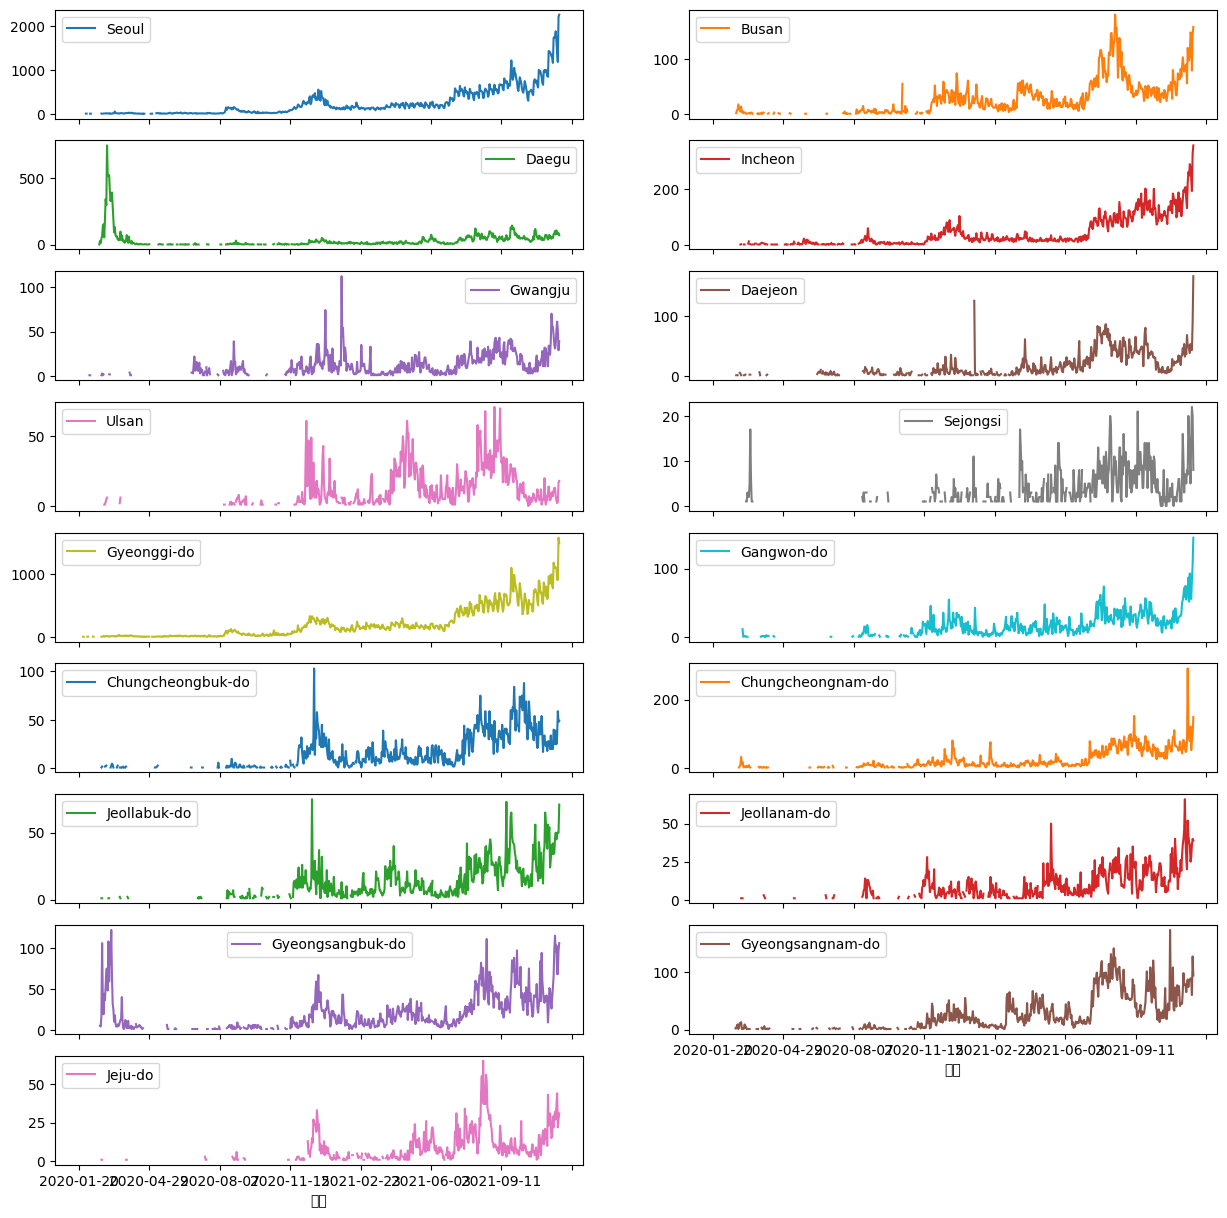

In [ ]:
df.plot.line(subplots=True,layout=(9,2),figsize=(15,15))

### `(2)` `(1)`과 같은 시각화를 `plotly` backend를 이용하여 시각화 하라. 시각화 예시는 아래와 같다.

**(주의) 판다스백엔드를 이용하지 않을 경우 정답으로 인정하지 않음.** 

In [31]:
#hide_input
HTML(requests.get('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/_html2').text)

#### Sol

In [32]:
_df= df.reset_index().melt("일자").\
        rename(columns={"일자":"Date","variable":"city"})

In [34]:
_df

,Date,city,value
0,2020-01-20,Seoul,NaN
1,2020-01-21,Seoul,NaN
2,2020-01-22,Seoul,NaN
3,2020-01-23,Seoul,NaN
4,2020-01-24,Seoul,1.0
...,...,...,...
11606,2021-11-28,Jeju-do,35.0
11607,2021-11-29,Jeju-do,44.0
11608,2021-11-30,Jeju-do,22.0
11609,2021-12-01,Jeju-do,27.0


In [35]:
fig=_df.plot.line(backend='plotly',
                 x='Date',
                 y='value',
                 color='city',
                 facet_col='city',
                 facet_col_wrap=3, 
                 facet_col_spacing=0.04,
                 height=1000)
fig.update_yaxes(matches=None,showticklabels=True)

##  `#4`. FIFA22 시각화 (20점)

아래는 `FIFA22`라는 온라인게임에서 선수들의 능력치가 저정된 url이다. 
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv
```
판다스를 이용하여 위의 데이터를 불러온 이후 물음에 답하라. 

### `(1)` 한국선수와 일본선수간 평균능력치를 barplot을 이용하여 비교하라. 비교하고 싶은 능력치의 목록은 아래와 같다. 

```python
abilities=['Crossing', 'Finishing','HeadingAccuracy','ShortPassing',
           'Volleys', 'Dribbling','Curve','FKAccuracy',
           'LongPassing','BallControl', 'Acceleration','SprintSpeed',
           'Agility', 'Reactions','Balance','ShotPower', 
           'Jumping', 'Stamina', 'Strength','LongShots',
           'Aggression','Interceptions', 'Positioning','Vision',
           'Penalties', 'Composure', 'StandingTackle','SlidingTackle']
```

**(주의) 판다스백엔드를 이용하지 않거나 아래의 시각화와 상이한 플랏이 그려질 경우 정답으로 인정하지 않음.** 
- 정답으로 인정하지 않는 예시: 바플랏이 세로로 되어있는 경우, Text가 보이지 않는 경우, 소수점이 3자리 이상 출력 되는 경우, interactive plot이 아닌 경우 등 
- 허용예시: 변수들의 정렬 순서가 다른 경우, height가 조금 다를 경우 

In [36]:
#hide_input
HTML(requests.get('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/_html3').text)

#### Sol

In [37]:
abilities=["Nationality",'Crossing', 'Finishing','HeadingAccuracy','ShortPassing',
           'Volleys', 'Dribbling','Curve','FKAccuracy',
           'LongPassing','BallControl', 'Acceleration','SprintSpeed',
           'Agility', 'Reactions','Balance','ShotPower', 
           'Jumping', 'Stamina', 'Strength','LongShots',
           'Aggression','Interceptions', 'Positioning','Vision',
           'Penalties', 'Composure', 'StandingTackle','SlidingTackle']

In [39]:
fifa = pd.read_csv("https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv")[abilities]

kj = ["Korea Republic","Japan"]

_fifa=fifa.query("Nationality == @kj").groupby("Nationality")\
                .agg(np.mean).reset_index()\
                .melt("Nationality")

_fifa["value"] = np.round(_fifa["value"],2)

In [40]:
_fifa["Nationality"]=list(map(lambda x : x.split(" ")[0],_fifa.Nationality))

In [41]:
_fifa.plot.barh(backend="plotly",y="variable",
                                            x="value",color="Nationality",text="value",
                                              barmode ="group",height=1500,width=1000)

### `(2)` 선수들의 Overall의 평균값이 가장 높은 상위 20개의 나라와 선수수가 가장 많은 상위 20개의 나라의 교집합을 구하라. 이 나라들에 한정하여 선수들의 평균연령(Age)을 계산한 뒤 평균연령을 정렬하고 barplot으로 시각화 하라. (시각화 패키지는 본인이 선호하는 패키지 사용)

#### Sol

In [43]:
fifa = pd.read_csv("https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv")

In [44]:
mean_table1 = fifa.groupby("Nationality").agg({"Overall":np.mean}).reset_index()
mean_table1["overall_rank20"]=mean_table1["Overall"].rank(ascending=False)<=20

mean_table2 =  fifa.groupby("Nationality").agg({"Nationality": "count"}).\
                    rename(columns = {"Nationality":"count"}).reset_index()

mean_table2["count_rank20"]=mean_table2["count"].rank(ascending=False)<=20

In [46]:
l1 = set(mean_table1.query("overall_rank20 == True")["Nationality"].to_list())
l2 = set(mean_table2.query("count_rank20 == True")["Nationality"].to_list())
l3 = list(l1.intersection(l2))
l3

['Argentina', 'Portugal', 'Brazil']

In [47]:
_fifa=fifa.query("Nationality == @l3").\
                groupby("Nationality").agg({"Age": np.mean}).reset_index().sort_values("Age",ascending=False)
_fifa

,Nationality,Age
0,Argentina,27.255319
1,Brazil,26.927961
2,Portugal,25.692090


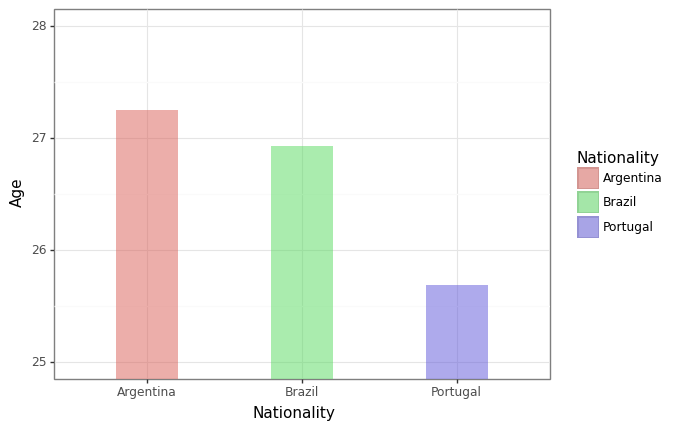

<ggplot: (8731109409555)>

In [48]:
(
    
ggplot(_fifa,aes(x="Nationality",y="Age")) + 
    geom_bar(aes(fill="Nationality"),stat="identity",alpha=0.5,width=0.4)+
    theme_bw()+coord_cartesian(ylim=(25,28))

)

## `#5`. 정권별 GDP/소득불균형 시각화 (20점)

아래는 한 가상국가의 최근 18년간 GDP와 불평등지수이다. 

In [49]:
pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df1.csv')

,GDP,Inequality,Government
0,500,56,A
1,550,58,A
2,530,59,A
3,480,61,A
4,550,64,A
5,550,64,B
6,750,66,B
7,560,68,B
8,800,70,B
9,900,65,B


그리고 아래는 각 정권별 평균 인구수를 기록한 것이다. (단위천) 

In [50]:
pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df2.csv',index_col=0)

,A,B,C,D
pop,54232.213,48823.432,46823.453,45232.119


### `(1)`. 정권의 GDP와 불평등지수를 시각화하고 정권은 색깔별로 구분하라. 선의 두깨는 인구수따라 다르게 나타내라. 시각화 예시는 아래와 같다. 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/final_FIG4.png?raw=true)

#### Sol

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df1.csv')
pop = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df2.csv',index_col=0)

In [52]:
_df = pd.merge(df,pop.melt(),left_on="Government",right_on="variable").\
                        iloc[:,[0,1,2,4]].rename(columns={"value":"pop"})

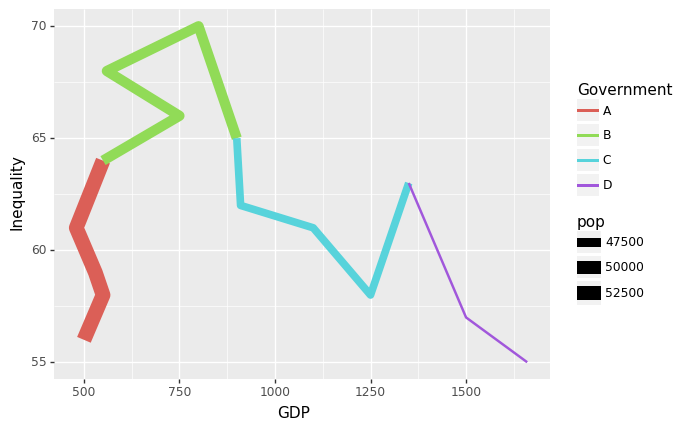

<ggplot: (8731123240132)>

In [53]:
(
ggplot(_df) + 
    geom_path(aes(x="GDP",
                  y="Inequality",
                  color="Government",
                  size="pop"))

)

### `(2)`. 정권 A,C는 진보성향의 정권이며 정권 B,D는 보수셩향의 정권이다. 아래의 데이터프레임을 이용하여 적절한 tidyset을 새로 만들고 정권의 성향을 선의 타입으로 나타내라. 

In [54]:
pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df3.csv',index_col=0)

,type
A,prog
B,cons
C,prog
D,cons


**(주의)** 주어진 데이터프레임을 변형 및 merge 하지 않고 직접입력등으로 tidy dataframe을 생성할 경우 답안으로 인정하지 않음. (즉 확장불가능한 코드는 정답으로 인정하지 않음) 

#### Sol

In [55]:
df3 = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df3.csv',index_col=0)

In [56]:
_df2= pd.merge(_df,df3.reset_index(),left_on="Government",right_on="index").iloc[:,[0,1,2,3,5]]
_df2.head()

,GDP,Inequality,Government,pop,type
0,500,56,A,54232.213,prog
1,550,58,A,54232.213,prog
2,530,59,A,54232.213,prog
3,480,61,A,54232.213,prog
4,550,64,A,54232.213,prog


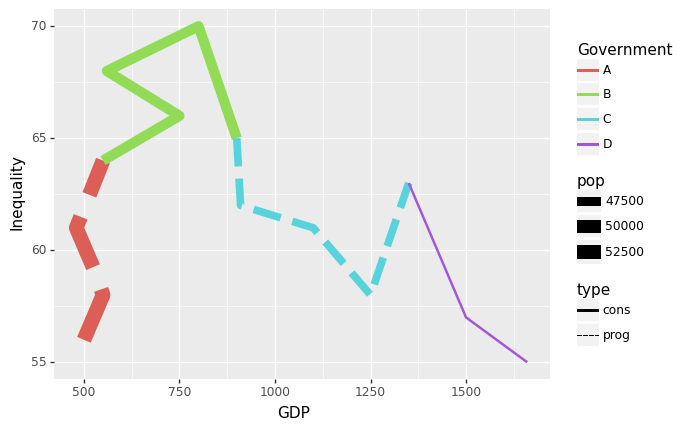

<ggplot: (8731123086189)>

In [57]:
(
ggplot(_df2) + 
    geom_path(aes(x="GDP",
                  y="Inequality",
                  color="Government",
                  size="pop",
                  linetype="type"))

)

## `#6`. 핸드폰 판매량 시각화 (50점)

### `(1)` 제조사별 판매량을 lineplot으로 시각화 하라.

#### Sol

In [59]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')

<Axes: xlabel='Date'>

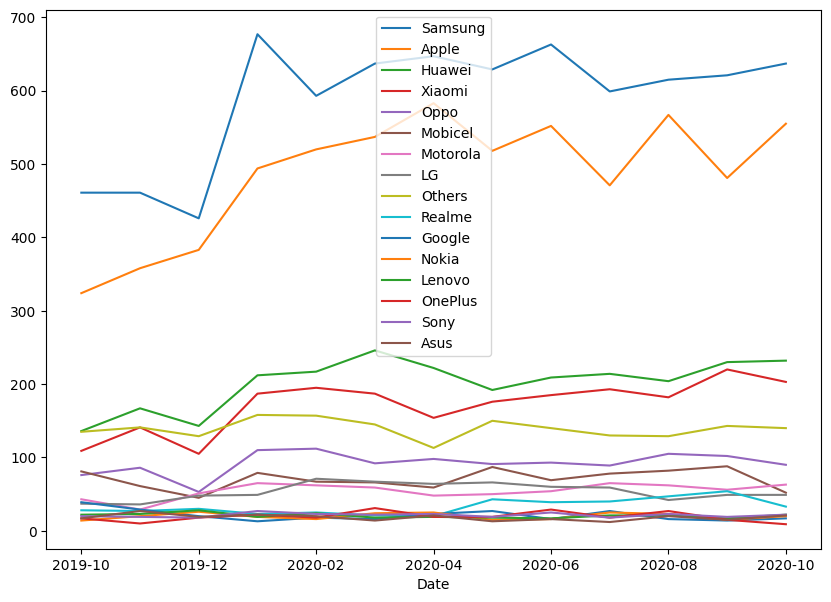

In [60]:
df.plot.line(x="Date",figsize=(10,7))

### `(2)` 제조사별 판매량을 lineplot으로 시각화 하라. 

#### Sol

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

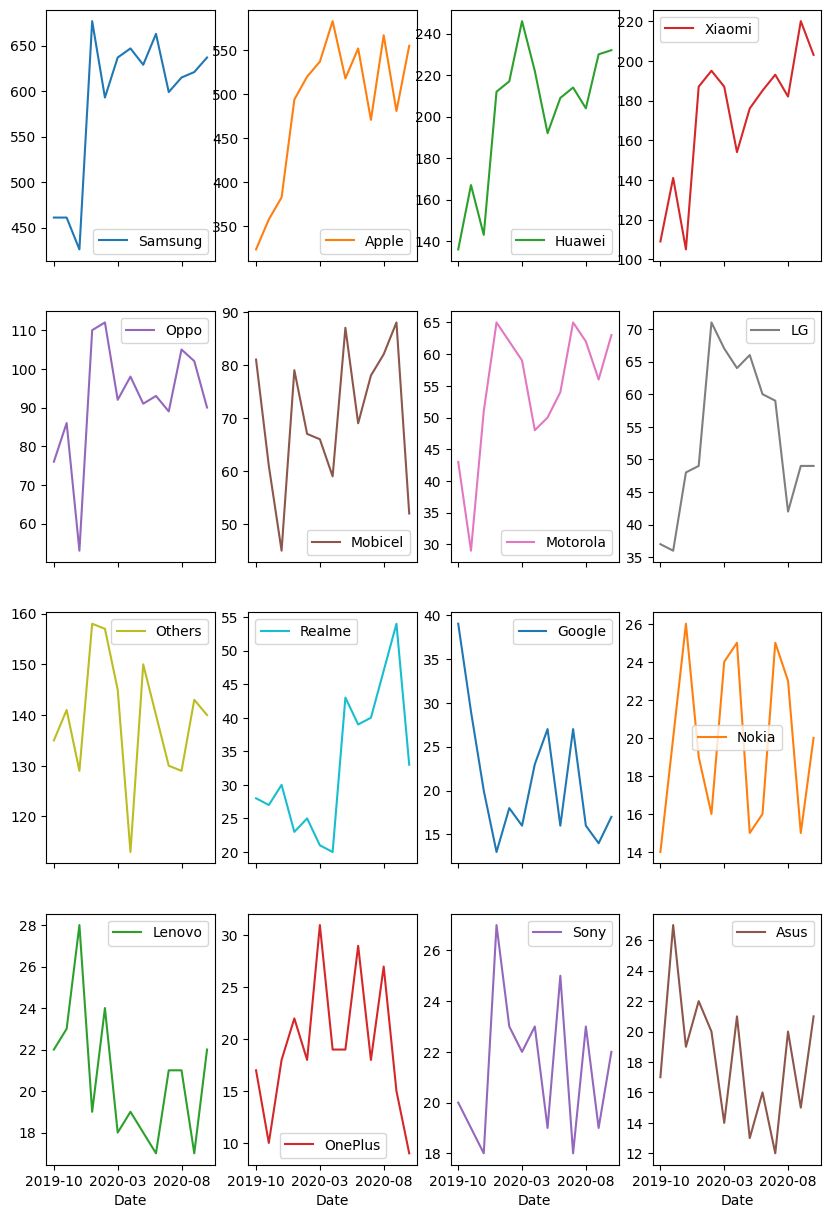

In [61]:
df.plot.line(x="Date",figsize=(10,15),subplots=True,layout=(4,4))

### `(3)` 제조사별 판매량을 조사하고 barplot으로 시각화 하라. 

#### Sol

<Axes: xlabel='manufacturer'>

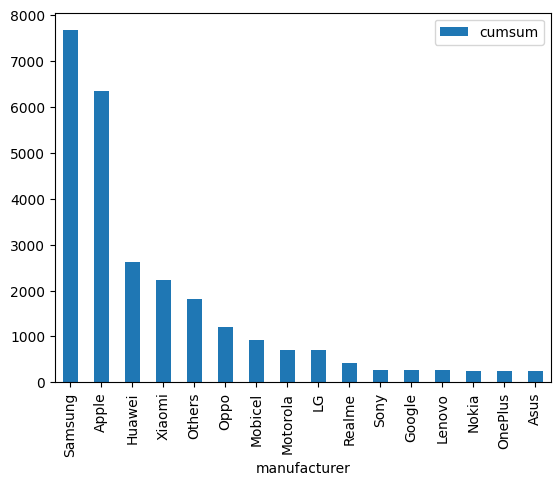

In [62]:
df.melt("Date").groupby("variable").\
                agg(sum).reset_index().\
                rename(columns={"variable":"manufacturer", "value":"cumsum"}).\
                sort_values("cumsum",ascending=False).plot.bar(x="manufacturer",y="cumsum",legend=True)

### `(4)` 2019년 제조사별 점유율을 조사하고 pieplot으로 시각화 하라. 

**Note** 

- 제조사별 점유율은 아래와 같이 계산. 

$$\textbf{2019년 삼성의 점유율} = \frac{\textbf{2019년 삼성의 판매량}}{\textbf{2019년 판매량의 총합}}$$

$$\textbf{2019년 Apple의 점유율} = \frac{\textbf{2019년 Apple의 판매량}}{\textbf{2019년 판매량의 총합}}$$

$$\dots$$

#### Sol

In [64]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
m_list = df.set_index("Date").columns.to_list()

In [65]:
_df = df.assign(Year = list(map(lambda x : x.split("-")[0],df.Date))).\
            query("Year == '2019'").\
            set_index("Date")[m_list]
_df

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19


In [67]:
s_2019= _df.values.sum()
s_2019

4736

In [68]:
m_df = (_df.reset_index().melt("Date").groupby("variable").agg(sum)/s_2019).\
        sort_values("value",ascending=False).reset_index()
m_df

,variable,value
0,Samsung,0.284628
1,Apple,0.224873
2,Huawei,0.094172
3,Others,0.085515
4,Xiaomi,0.074958
5,Oppo,0.045397
6,Mobicel,0.039485
7,Motorola,0.025971
8,LG,0.025549
9,Google,0.018581


Text(0, 0.5, '')

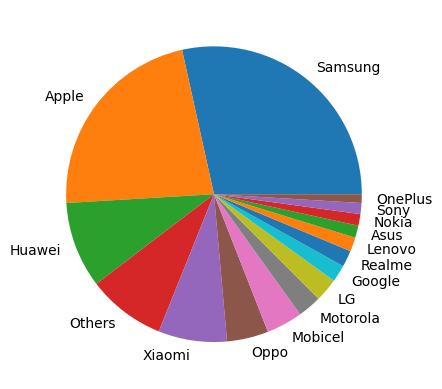

In [69]:
m_df.set_index("variable").plot.pie(y="value",legend=False).set_ylabel("")

### `(5)` 2019년과 2020년의 월별판매량의 평균을 구하고 바플랏으로 비교하라. 

**Note** 

- 2019년도의 월별판매량은 아래와 같이 구한다. (그리고 2020년도의 월별판매량도 유사한 수식으로 구한다.) 
    - 2019년 10월 판매량 = 삼성의 2019년 10월 판매량 + ... + Asus의 2019년 10월 판매량
    - 2019년 11월 판매량 = 삼성의 2019년 10월 판매량 + ... + Asus의 2019년 10월 판매량
    - 2019년 12월 판매량 = 삼성의 2019년 10월 판매량 + ... + Asus의 2019년 10월 판매량

- 2019년도의 월별판매량의 평균은 아래와 같이 구한다. (그리고 2020년도의 월별판매량의 평균도 유사한 수식으로 구한다. ) 

$$\textbf{2019년 월별 판매량의 평균} = \frac{\textbf{2019년 10월 판매량 + 2019년 11월 판매량 + 2019년 12월 판매량}}{3}$$

#### Sol

In [70]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
m_list = df.set_index("Date").columns.to_list()

df["month_sales"] = list(df.set_index("Date").sum(axis=1))

df = df.assign(Year = list(map(lambda x : x.split("-")[0],df.Date)),
               Month = list(map(lambda x : x.split("-")[1],df.Date)))
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus,month_sales,Year,Month
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17,1559,2019,10
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27,1635,2019,11
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19,1542,2019,12
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22,2176,2020,01
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20,2138,2020,02
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14,2182,2020,03
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21,2138,2020,04
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13,2113,2020,05
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16,2183,2020,06
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12,2059,2020,07


In [71]:
_df = df.iloc[:,map(lambda x : x not in m_list, df.columns)]
_df

,Date,month_sales,Year,Month
0,2019-10,1559,2019,10
1,2019-11,1635,2019,11
2,2019-12,1542,2019,12
3,2020-01,2176,2020,01
4,2020-02,2138,2020,02
5,2020-03,2182,2020,03
6,2020-04,2138,2020,04
7,2020-05,2113,2020,05
8,2020-06,2183,2020,06
9,2020-07,2059,2020,07


In [72]:
_df.groupby("Year").agg(np.mean).T

Year,2019,2020
month_sales,1578.666667,2145.8


<Axes: >

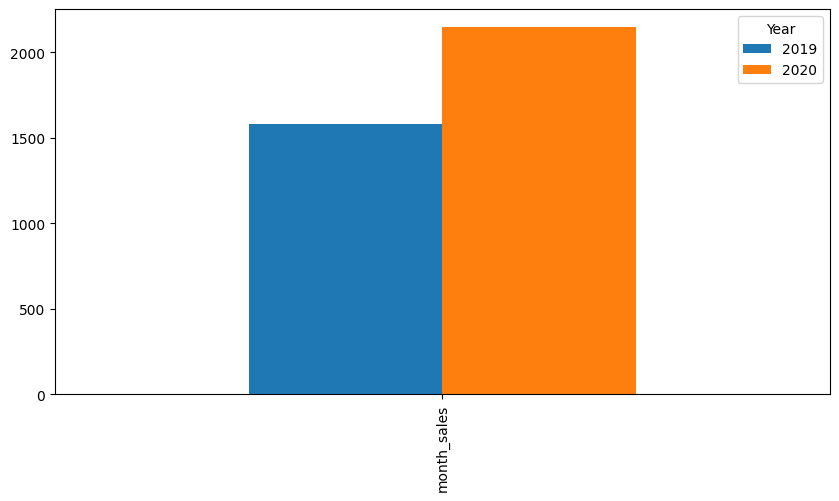

In [73]:
_df.groupby("Year").agg(np.mean).T.plot.bar(figsize=(10,5))

## `#7`. 대한민국 출산율 (20점)

다음을 잘 읽고 적절한 시각화 플랏을 제시하라. (판다스 backend를 이용하여 시각화 하며, backend 엔진은 `matplotlib`, `plotly` 중 택하여 시각화) 

### `(1)` 아래는 "2020년 행정구역별 출생아 수, 출생률, 출산율 통계"를 나타낸 표이다. 행정구역별 출생자수를 pie chart로 시각화하라. 

#### Sol

In [77]:
df = pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC')[17]

In [92]:
df = df.iloc[:17,:]

In [93]:
px.pie(df,names = "지역", values= "출생아 수(천명)")

### `(2)` 아래는 "2001-2019 지역별 합계출산율"을 정리한 데이터이다. (1)의 데이터프레임과 결합하여 "2001-2020 지역별 합계출산율" 데이터를 만들고 lineplot을 이용하여 시각화하라. ($x$축은 년도, $y$축은 합계출산율, 지역은색깔로 구분하여 시각화할 것) 

#### Sol

In [94]:
df = pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC')[17]
df2 = pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC')[18]

In [95]:
_df = df.iloc[:17,:]
_df2 = df2.iloc[1:,:].reset_index(drop=True)

In [96]:
sp_2020 = _df.iloc[:,[0,3]]
sp_2020 = sp_2020.sort_values("지역",ascending=True).reset_index(drop=True).rename(columns={"합계출산율" : "2020"})
_df2 = _df2.sort_values("Unnamed: 0",ascending=True).reset_index(drop=True)

In [97]:
l = [str(i) for i in range (2001,2021)]

In [98]:
td = pd.concat([sp_2020,_df2],axis=1).set_index("지역")

In [99]:
_td = td[l].applymap(lambda x : float(x) if x!="-" else None)
_td

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
지역,,,,,,,,,,,,,,,,,,,,
강원도,1.413,1.317,1.279,1.261,1.188,1.202,1.356,1.253,1.248,1.313,1.338,1.374,1.249,1.248,1.311,1.237,1.123,1.067,1.082,1.04
경기도,1.437,1.305,1.321,1.280,1.183,1.239,1.361,1.285,1.226,1.309,1.314,1.355,1.226,1.241,1.272,1.194,1.069,1.002,0.943,0.88
경상남도,1.417,1.272,1.290,1.266,1.189,1.254,1.434,1.368,1.323,1.413,1.446,1.503,1.367,1.409,1.437,1.358,1.227,1.122,1.046,0.95
경상북도,1.402,1.232,1.253,1.203,1.173,1.208,1.369,1.313,1.274,1.377,1.434,1.489,1.379,1.408,1.464,1.396,1.256,1.167,1.089,1.00
광주,1.421,1.264,1.278,1.203,1.105,1.152,1.262,1.198,1.137,1.223,1.234,1.295,1.170,1.199,1.207,1.168,1.053,0.972,0.913,0.81
대구,1.216,1.076,1.116,1.087,1.001,1.011,1.137,1.072,1.029,1.109,1.146,1.217,1.127,1.169,1.216,1.186,1.067,0.987,0.932,0.81
대전,1.330,1.207,1.221,1.181,1.107,1.158,1.274,1.215,1.156,1.205,1.261,1.315,1.234,1.250,1.277,1.192,1.075,0.952,0.883,0.81
부산,1.103,0.975,0.988,0.953,0.887,0.915,1.024,0.980,0.940,1.045,1.078,1.135,1.049,1.090,1.139,1.095,0.976,0.899,0.827,0.75
서울,1.111,1.006,1.014,1.015,0.932,0.980,1.068,1.010,0.962,1.015,1.014,1.059,0.968,0.983,1.001,0.940,0.836,0.761,0.717,0.64


In [100]:
_td.reset_index().melt("지역").rename(columns=({"variable": "Year"}))

,지역,Year,value
0,강원도,2001,1.413
1,경기도,2001,1.437
2,경상남도,2001,1.417
3,경상북도,2001,1.402
4,광주,2001,1.421
...,...,...,...
335,전라남도,2020,1.150
336,전라북도,2020,0.910
337,제주도,2020,1.020
338,충청남도,2020,1.030


In [101]:
fig = _td.reset_index().melt("지역").rename(columns=({"variable": "Year"})).\
                plot.line(backend="plotly",
                          x="Year",y="value",color="지역",
                          facet_col="지역",
                          facet_col_wrap=3,height=1000)
fig.update_yaxes(matches=None,showticklabels=True)